In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

df_no_temp = pd.read_csv('../data/RFID_DATA_SET_NOTEMP_CLEANED.csv')
df_temp = pd.read_csv('../data/RFID_DATA_SET_TEMP_CLEANED.csv')

In [69]:
print(df_temp)
print(df_no_temp)

      TagNo  Distance  Temperature  RealTemp  RSSI      FREQ H_RSSI  H_FREQ  \
0         1        10           33      33.7   238  16529165     ee  fc370d   
1         1        10           33      33.7   237  11287565     ed  ac3c0d   
2         1        10           33      33.7   236   5519885     ec  543a0d   
3         1        10           33      33.7   237  10761485     ed  a4350d   
4         1        10           33      33.7   252  16529165     fc  fc370d   
...     ...       ...          ...       ...   ...       ...    ...     ...   
9995     10       200           21      20.2     0         0      0       0   
9996     10       200           21      20.2     0         0      0       0   
9997     10       200           21      20.2     0         0      0       0   
9998     10       200           21      20.2     0         0      0       0   
9999     10       200           21      20.2     0         0      0       0   

                            ID                     

In [70]:
df_temp_group = df_temp.groupby('Temperature')
df_temp_29 = df_temp_group.get_group(29)
df_temp_21 = df_temp_group.get_group(21)
df_temp_33 = df_temp_group.get_group(33)
df_temp_25 = df_temp_group.get_group(25)
df_temp_37 = df_temp_group.get_group(37)

new_df = pd.concat([df_no_temp,df_temp_29,df_temp_21])
print(len(new_df))
new_df.head(100)

6000


,TagNo,Distance,Temperature,RealTemp,RSSI,FREQ,H_RSSI,H_FREQ,ID,Data,Detect
0,1,10,0,0.0,234,10761485,ea,a4350d,e20051397201021118904d81,441601eaa4350d0e3000e20051397201021118904d81,1
1,1,20,0,0.0,214,16529165,d6,fc370d,e20051397201021118904d81,441601d6fc370d0e3000e20051397201021118904d81,1
2,1,30,0,0.0,178,11287565,b2,ac3c0d,e20051397201021118904d81,441601b2ac3c0d0e3000e20051397201021118904d81,1
3,1,40,0,0.0,146,5519885,92,543a0d,e20051397201021118904d81,44160192543a0d0e3000e20051397201021118904d81,1
4,1,50,0,0.0,128,10761485,80,a4350d,e20051397201021118904d81,44160180a4350d0e3000e20051397201021118904d81,1
...,...,...,...,...,...,...,...,...,...,...,...
95,1,160,0,0.0,0,0,0,0,NaN,4405000000,0
96,1,170,0,0.0,85,5519885,55,543a0d,e20051397201021118904d81,44160155543a0d0e3000e20051397201021118904d81,1
97,1,180,0,0.0,37,10761485,25,a4350d,e20051397201021118904d81,44160125a4350d0e3000e20051397201021118904d81,1
98,1,190,0,0.0,0,0,0,0,NaN,4405000000,0


In [71]:
from statistics import mean
# average per distance
df_no_temp2 = df_no_temp[['Distance','RSSI','Detect']]
no_temp_dist_group = df_no_temp2.groupby('Distance')
no_temp_dist10 = no_temp_dist_group.get_group(10)
no_temp_dist20 = no_temp_dist_group.get_group(20)
no_temp_dist30 = no_temp_dist_group.get_group(30)
no_temp_dist40 = no_temp_dist_group.get_group(40)
no_temp_dist50 = no_temp_dist_group.get_group(50)
no_temp_dist60 = no_temp_dist_group.get_group(60)
no_temp_dist70 = no_temp_dist_group.get_group(70)
no_temp_dist80 = no_temp_dist_group.get_group(80)
no_temp_dist90 = no_temp_dist_group.get_group(90)
no_temp_dist100 = no_temp_dist_group.get_group(100)
no_temp_dist110 = no_temp_dist_group.get_group(110)
no_temp_dist120 = no_temp_dist_group.get_group(120)
no_temp_dist130 = no_temp_dist_group.get_group(130)
no_temp_dist140 = no_temp_dist_group.get_group(140)
no_temp_dist150 = no_temp_dist_group.get_group(150)
no_temp_dist160 = no_temp_dist_group.get_group(160)
no_temp_dist170 = no_temp_dist_group.get_group(170)
no_temp_dist180 = no_temp_dist_group.get_group(180)
no_temp_dist190 = no_temp_dist_group.get_group(190)
no_temp_dist200 = no_temp_dist_group.get_group(200)

all_rssi_no_temp = [mean(no_temp_dist10['RSSI']),mean(no_temp_dist20['RSSI']),mean(no_temp_dist30['RSSI']),mean(no_temp_dist40['RSSI']),mean(no_temp_dist50['RSSI'])
           ,mean(no_temp_dist60['RSSI']),mean(no_temp_dist70['RSSI']),mean(no_temp_dist80['RSSI']),mean(no_temp_dist90['RSSI']),mean(no_temp_dist100['RSSI'])
           ,mean(no_temp_dist110['RSSI']),mean(no_temp_dist120['RSSI']),mean(no_temp_dist130['RSSI']),mean(no_temp_dist140['RSSI']),mean(no_temp_dist150['RSSI']),
           mean(no_temp_dist160['RSSI']),mean(no_temp_dist170['RSSI']),mean(no_temp_dist180['RSSI']),mean(no_temp_dist190['RSSI']),mean(no_temp_dist200['RSSI'])]
all_rssi_no_temp

[221.44,
 212.48,
 194.14,
 147.66,
 114.98,
 88.53,
 78.85,
 90.2,
 87.28,
 69.3,
 54.78,
 33.61,
 10.3,
 17.86,
 8.68,
 10.29,
 2.49,
 0.49,
 0.8,
 0.8]

In [72]:
temp_dist_group = df_temp.groupby('Distance')
temp_dist10 = temp_dist_group.get_group(10)
temp_dist20 = temp_dist_group.get_group(20)
temp_dist30 = temp_dist_group.get_group(30)
temp_dist40 = temp_dist_group.get_group(40)
temp_dist50 = temp_dist_group.get_group(50)
temp_dist60 = temp_dist_group.get_group(60)
temp_dist70 = temp_dist_group.get_group(70)
temp_dist80 = temp_dist_group.get_group(80)
temp_dist90 = temp_dist_group.get_group(90)
temp_dist100 = temp_dist_group.get_group(100)
temp_dist110 = temp_dist_group.get_group(110)
temp_dist120 = temp_dist_group.get_group(120)
temp_dist130 = temp_dist_group.get_group(130)
temp_dist140 = temp_dist_group.get_group(140)
temp_dist150 = temp_dist_group.get_group(150)
temp_dist160 = temp_dist_group.get_group(160)
temp_dist170 = temp_dist_group.get_group(170)
temp_dist180 = temp_dist_group.get_group(180)
temp_dist190 = temp_dist_group.get_group(190)
temp_dist200 = temp_dist_group.get_group(200)

all_rssi_temp = [mean(temp_dist10['RSSI']),mean(temp_dist20['RSSI']),mean(temp_dist30['RSSI']),mean(temp_dist40['RSSI']),mean(temp_dist50['RSSI'])
           ,mean(temp_dist60['RSSI']),mean(temp_dist70['RSSI']),mean(temp_dist80['RSSI']),mean(temp_dist90['RSSI']),mean(temp_dist100['RSSI'])
           ,mean(temp_dist110['RSSI']),mean(temp_dist120['RSSI']),mean(temp_dist130['RSSI']),mean(temp_dist140['RSSI']),mean(temp_dist150['RSSI']),
           mean(temp_dist160['RSSI']),mean(temp_dist170['RSSI']),mean(temp_dist180['RSSI']),mean(temp_dist190['RSSI']),mean(temp_dist200['RSSI'])]
all_rssi_temp

[213.078,
 198.642,
 193.536,
 153.596,
 134.514,
 90.656,
 87.74,
 90.984,
 99.038,
 85.556,
 69.218,
 36.836,
 27.894,
 21.844,
 18.75,
 23.882,
 10.476,
 5.836,
 1.762,
 0.384]

In [73]:
dataset = df_no_temp.sort_values(by=['Distance'])
X = dataset['Distance'].to_frame()
y = dataset['RSSI'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(X_train)
poly.fit(X_train, y_train)
model = LinearRegression()
model.fit(x_poly, y_train)

# plt.scatter(X_test, y_test, color='purple')
y_pred = model.predict(poly.fit_transform(X_test))
r2 = r2_score(y_test, y_pred)
print("R2 NO = "+str(r2))

R2 NO = 0.7252119621638033


In [74]:
dataset = df_temp_29.sort_values(by=['Distance'])
X29 = dataset['Distance'].to_frame()
y29 = dataset['RSSI'].values
X_train29, X_test29, y_train29, y_test29 = train_test_split(X29, y29, test_size=0.2, random_state=0)

poly29 = PolynomialFeatures(degree=1)
x_poly29 = poly29.fit_transform(X_train29)
poly29.fit(X_train29, y_train29)
model29 = LinearRegression()
model29.fit(x_poly29, y_train29)

# plt.scatter(X_test29, y_test29, color='red')
y_pred29 = model29.predict(poly.fit_transform(X_test29))
r2_29 = r2_score(y_test29, y_pred29)
print("R2 29 = "+str(r2_29))

R2 29 = 0.7780210465672615


In [75]:
dataset = df_temp_21.sort_values(by=['Distance'])
X21 = dataset['Distance'].to_frame()
y21 = dataset['RSSI'].values
X_train21, X_test21, y_train21, y_test21 = train_test_split(X21, y21, test_size=0.2, random_state=0)

poly21 = PolynomialFeatures(degree=1)
x_poly21 = poly21.fit_transform(X_train21)
poly21.fit(X_train21, y_train21)
model21 = LinearRegression()
model21.fit(x_poly21, y_train21)

# plt.scatter(X_test29, y_test29, color='red')
y_pred21 = model21.predict(poly.fit_transform(X_test21))
r2_21 = r2_score(y_test21, y_pred21)
print("R2 21 = "+str(r2_21))

R2 21 = 0.49692822647123125


In [76]:
dataset = df_temp_33.sort_values(by=['Distance'])
X33 = dataset['Distance'].to_frame()
y33 = dataset['RSSI'].values
X_train33, X_test33, y_train33, y_test33 = train_test_split(X33, y33, test_size=0.2, random_state=0)

poly33 = PolynomialFeatures(degree=1)
x_poly33 = poly33.fit_transform(X_train33)
poly33.fit(X_train33, y_train33)
model33 = LinearRegression()
model33.fit(x_poly33, y_train33)

# plt.scatter(X_test29, y_test29, color='red')
y_pred33 = model33.predict(poly.fit_transform(X_test33))
r2_33 = r2_score(y_test33, y_pred33)
print("R2 33 = "+str(r2_33))

R2 33 = 0.7219476234137303


In [77]:
dataset = df_temp_25.sort_values(by=['Distance'])
X25 = dataset['Distance'].to_frame()
y25 = dataset['RSSI'].values
X_train25, X_test25, y_train25, y_test25 = train_test_split(X25, y25, test_size=0.2, random_state=0)

poly25 = PolynomialFeatures(degree=1)
x_poly25 = poly25.fit_transform(X_train25)
poly25.fit(X_train25, y_train25)
model25 = LinearRegression()
model25.fit(x_poly25, y_train25)

# plt.scatter(X_test29, y_test29, color='red')
y_pred25 = model25.predict(poly.fit_transform(X_test25))
r2_25 = r2_score(y_test25, y_pred25)
print("R2 25 = "+str(r2_25))

R2 25 = 0.5980960500821765


In [78]:
dataset = df_temp_37.sort_values(by=['Distance'])
X37 = dataset['Distance'].to_frame()
y37 = dataset['RSSI'].values
X_train37, X_test37, y_train37, y_test37 = train_test_split(X37, y37, test_size=0.2, random_state=0)

poly37 = PolynomialFeatures(degree=1)
x_poly37 = poly37.fit_transform(X_train37)
poly37.fit(X_train37, y_train37)
model37 = LinearRegression()
model37.fit(x_poly37, y_train37)

# plt.scatter(X_test29, y_test29, color='red')
y_pred37 = model37.predict(poly.fit_transform(X_test37))
r2_37 = r2_score(y_test37, y_pred37)
print("R2 37 = "+str(r2_37))

R2 37 = 0.7310710811161056


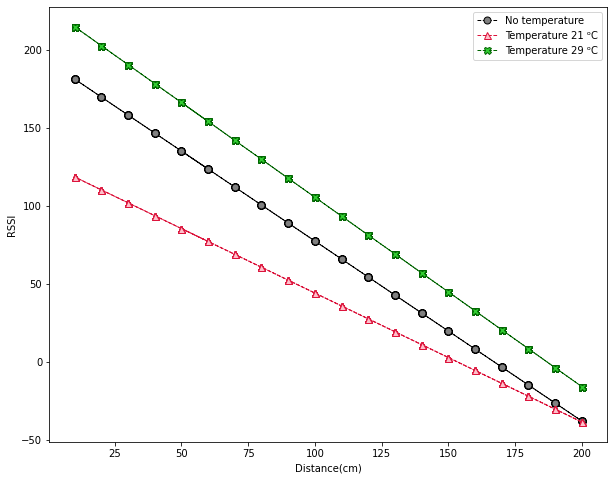

In [79]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, label='No temperature', color='black',marker='o',linestyle='dashed', linewidth = 1, markerfacecolor='gray', markersize=7)
plt.plot(X_test21, y_pred21, label='Temperature 21 ᵒC', color='crimson', linestyle='dashed', linewidth = 1, marker='^', markerfacecolor='pink', markersize=7)
# plt.plot(X_test25, y_pred25, label='Temperature 25 ᵒC', color='indigo', linestyle='dashed', linewidth = 1, marker='d', markerfacecolor='plum', markersize=6)
plt.plot(X_test29, y_pred29, label='Temperature 29 ᵒC', color='darkgreen',marker='X',linestyle='dashed', linewidth = 1, markerfacecolor='limegreen', markersize=7)
# plt.plot(X_test33, y_pred33, label='Temperature 33 ᵒC', color='gold', linestyle='dashed', linewidth = 1, marker='p', markerfacecolor='lightyellow', markersize=6)
# plt.plot(X_test37, y_pred37, label='Temperature 37 ᵒC', color='dodgerblue', linestyle='dashed', linewidth = 1, marker='s', markerfacecolor='lightblue', markersize=6)

plt.legend()
plt.xlabel('Distance(cm)')
plt.ylabel('RSSI')
# plt.title('Comparison of the RSSI estimation')
# plt.figtext(.01, .04, "No temperature: r2 = "+str(r2))
# plt.figtext(.01, .08, "Temperature 29ᵒC: r2 = "+str(r2_29))
plt.savefig('../img/compare_polynomial.png', dpi=150)
plt.show()